In [1]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import graphviz

### Example of a decision tree

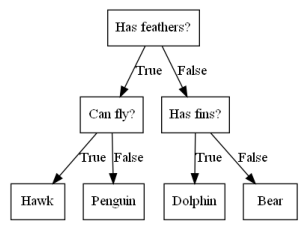

In [2]:
mglearn.plots.plot_animal_tree()

## 1 Build a decision tree

In [3]:
# can apply for both classification and regression

## 2 Control the complexity

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0) # without control result overfitting
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0) # prune
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## 3 Decision tree analysis

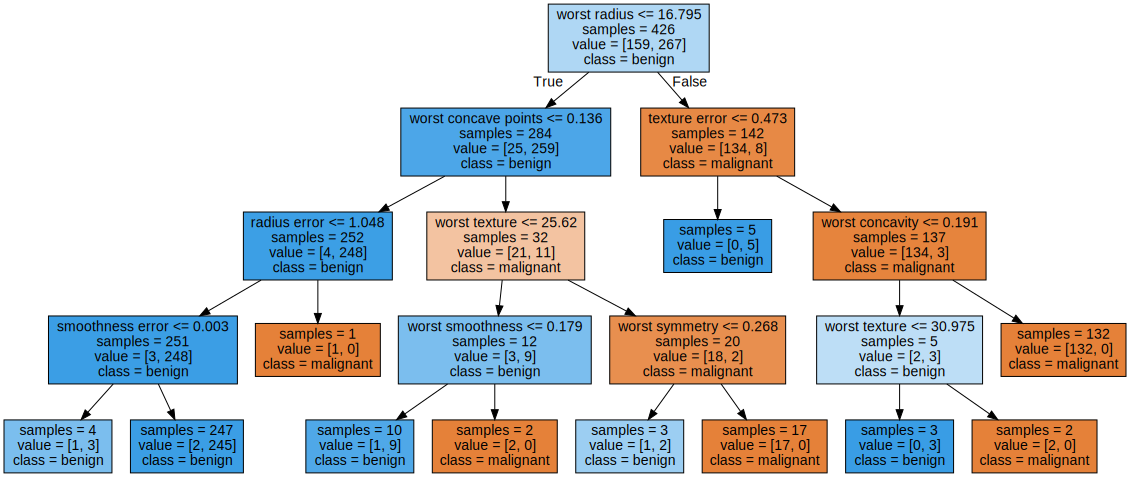

In [6]:
# visualize the tree
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=[
                "malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 4 Feature importance

In [7]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Text(0, 0.5, 'Feature')

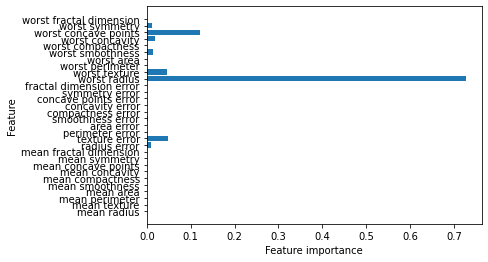

In [8]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

Feature importances: [0. 1.]


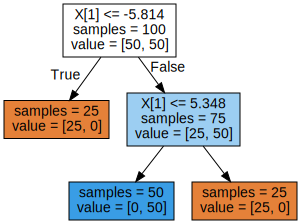

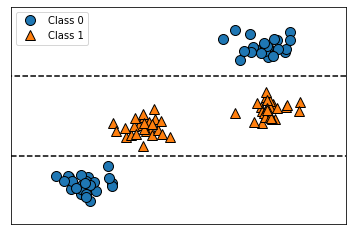

In [9]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)
# 决策树只认为两个特征中只有第二个重要，因此只在y轴方向分类
# 显然这种分类虽然合理但是过于粗暴，或者单调

### Decision tree for regression

Text(0, 0.5, 'Price in $/Mbyte')

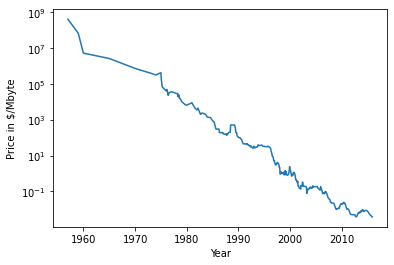

In [10]:
# predict test data can't out of range in train set
ram_prices = pd.read_csv("data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

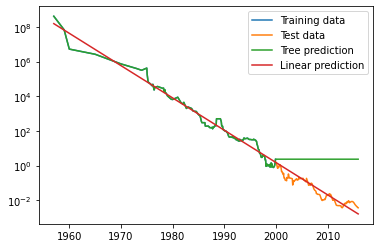

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
X_train = np.array(data_train.date)[:, np.newaxis]  # 一维变二维
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = np.array(ram_prices.date)[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

plt.semilogy(data_train.date, data_train.price,
             label="Training data")  # basicly the same as training data
plt.semilogy(data_test.date, data_test.price, label="Test data")
# can predict beyond train range
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
# a line fit the data, but missing detail
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()